# Own model
This Jupyter Notebook is divided into two main codes. The first code under the Markdown [“Google Colab”](#google-colab) can work with the instructions in Google Colab. The second code under the markdown [“Local”](#local) can be executed locally. 

In [7]:
#uncoment the following two lines if running in google colab
#from google.colab import drive 
#drive.mount('/content/drive') 

import tensorflow as tf
import matplotlib.pyplot as plt

# Google Colab
The code below is intended for execution in Google Colab. To execute the code in Google Colab you have to comment out the above import for Google Colab and compress the already restructured folder into a zip file and upload “Dataset_Original.zip” to your Google Drive.

You can then extract the folder with the ZIP extractor.

<img src="ImageLib/GoogleDriveZip.jpg" alt="GoogleDrive image" style="width:700px;"/>

Furthermore, you have to make sure that the paths point correctly to your Google Drive folder

In [ ]:
# Directories for training and test data
train_dir = '/content/drive/MyDrive/ML2/Dataset_Original/train'
test_dir = '/content/drive/MyDrive/ML2/Dataset_Original/test'

# Image sizes and batch size
IMAGE_SIZE = (224, 224)  
BATCH_SIZE = 32


# Load the images from the directories
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.25,
    subset="training"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.25,
    subset="validation"
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999
)

# Add standardization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize the datasets
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Prefetching und Caching for efficiency
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Definiere die Datenaugmentierungsschichten
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_dataset,
    epochs=9,
    validation_data=validation_dataset
)

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')
plt.show()

# Local

This code can be executed locally. It uses the data augmentation script “dataPreparation.py”. Please check that the path to your data set matches.

Found 1178 files belonging to 3 classes.
Using 884 files for training.
Found 1178 files belonging to 3 classes.
Using 294 files for validation.
Found 393 files belonging to 3 classes.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,163 (42.47 MB)

 Trainable params: 11,132,163 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 757ms/step - accuracy: 0.3254 - loss: 3.8168 - val_accuracy: 0.3946 - val_loss: 1.0529
Epoch 2/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 414ms/step - accuracy: 0.4969 - loss: 0.9380 - val_accuracy: 0.6190 - val_loss: 0.7698
Epoch 3/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 429ms/step - accuracy: 0.5989 - loss: 0.7873 - val_accuracy: 0.6259 - val_loss: 0.7335
Epoch 4/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 420ms/step - accuracy: 0.6212 - loss: 0.7409 - val_accuracy: 0.7143 - val_loss: 0.6396
Epoch 5/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 418ms/step - accuracy: 0.6790 - loss: 0.6605 - val_accuracy: 0.6973 - val_loss: 0.6026
Epoch 6/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 413ms/step - accuracy: 0.7204 - loss: 0.6415 - val_accuracy: 0.8435 - val_loss: 0.4749
Epoch 7/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 439ms/step - accuracy: 0.8057 - loss: 0.5200 - val_accuracy: 0.8367 - val_loss: 0.4042
Epoch 8/9
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 420ms/step - accuracy: 0.7630 - loss: 0.5237 - val_accuracy: 0.

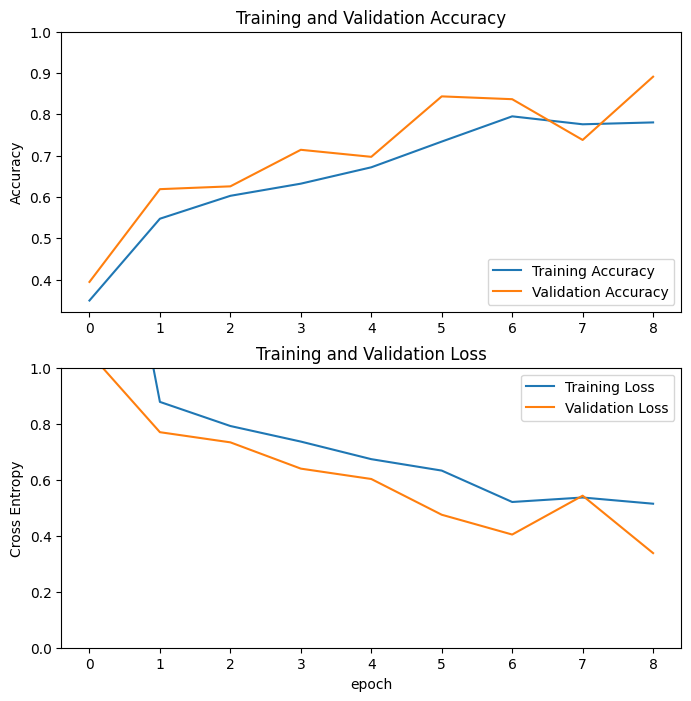

In [12]:
# Directories for training and test data
train_dir = '../ML2Project/Dataset_Original/train'
test_dir = '../ML2Project/Dataset_Original/test'

from dataPreparation import load_and_prepare_datasets, get_data_augmentation


# Image sizes and batch size
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = IMAGE_SIZE + (3,)
BATCH_SIZE = 32

# Load and prepare the dataset
train_dataset, validation_dataset, test_dataset = load_and_prepare_datasets(train_dir, test_dir, IMAGE_SIZE, BATCH_SIZE)

# Get the data augmentation layers
data_augmentation = get_data_augmentation()

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_dataset,
    epochs=9,
    validation_data=validation_dataset
)

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')
plt.show()